# Notebook : Comparing the classic BKT with cheated BKT structure

In [1]:
import sys

sys.path.append("/Users/olivier/PycharmProjects/bayesian-kst/")
from kgraph.expert_layer.domain_graph import DomainGraph
from kgraph.expert_layer.knowledge_components import KnowledgeComponent
from kgraph.expert_layer.links import LinkModel, LinkFromParents
from kgraph.resources_layer.exercise_family import ExerciseFamily
from kgraph.resources_layer.exercise import Exercise
from kgraph.learner_layer.evaluation import Evaluation
from kgraph.learner_layer.learner_pool import LearnerPool

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn

## 1) Réalisation de l'exercice associé à KC A

In [2]:
answers = {"ex_1": {'success': True}, "ex_2": {'success': False}, "ex_3": {'success': True}}

### Classic BKT

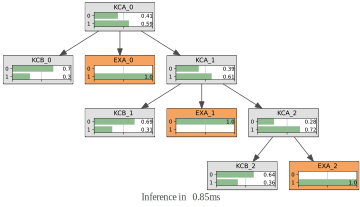

In [3]:
bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))
    bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))
    bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": False}] = [.99, .01]
    bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": True}] = [.5, .5]

    bkt_net.add(gum.LabelizedVariable(f"EXA_{i}", '', 2))
    bkt_net.addArc(*(f"KCA_{i}", f"EXA_{i}"))
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": False}] = [1-guess, guess]
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": True}] = [slip, 1-slip]
    evs[f"EXA_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        bkt_net.addArc(*(f"KCA_{i-1}", f"KCA_{i}"))
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False}] = [1-learn, learn]
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True}] = [0, 1]
    
bkt_net.cpt(f"KCA_0").fillWith([.5, .5])
gnb.showInference(bkt_net, evs=evs)

In [4]:
bkt_net

(gum::BayesNet<double>@0x126187400) BN{nodes: 9, arcs: 8, domainSize: 512, dim: 34}

### Cheated BKT network V1 

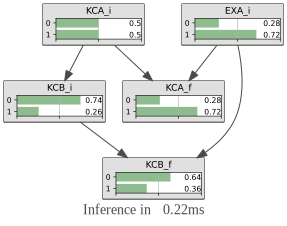

In [5]:
v1_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v1_cheated_bkt_net.addArc(*(f"EXA_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": False}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": True}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": False}] = [0, 1]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": True}] = [0, 1]

v1_cheated_bkt_net.addArc(*(f"EXA_i", f"KCB_f"))
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": False, "KCB_i": False}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": False, "KCB_i": True}] = [.99, .01]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": True, "KCB_i": False}] = [.5, .5]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": True, "KCB_i": True}] = [.5, .5]



v1_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v1_cheated_bkt_net.cpt(f"EXA_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v1_cheated_bkt_net)

### Cheated BKT network V2

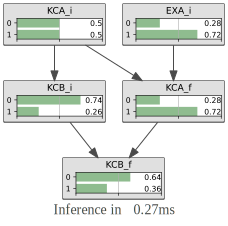

In [6]:
v2_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v2_cheated_bkt_net.addArc(*(f"EXA_i", f"KCA_f"))
v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v2_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": False}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": True}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": False}] = [0, 1]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": True}] = [0, 1]

v2_cheated_bkt_net.addArc(*(f"KCA_f", f"KCB_f"))
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": False}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": True}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": False}] = [.5, .5]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": True}] = [.5, .5]



v2_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v2_cheated_bkt_net.cpt(f"EXA_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v2_cheated_bkt_net)

### Cheated BKT network V3

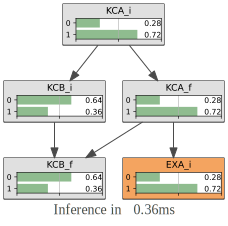

In [7]:
v3_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v3_cheated_bkt_net.addArc(*(f"KCA_f", "EXA_i"))
v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v3_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": True}] = [0, 1]

v3_cheated_bkt_net.cpt(f"EXA_i")[{f"KCA_f": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"EXA_i")[{f"KCA_f": True}] = [0, 1]



v3_cheated_bkt_net.addArc(*(f"KCA_f", f"KCB_f"))
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": True}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": False}] = [.5, .5]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": True}] = [.5, .5]



v3_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])

gnb.showInference(v3_cheated_bkt_net, evs={"EXA_i": [1-ex_fam_a_score, ex_fam_a_score]})

## 2) Réalisation de l'exercice associé à KC B

### Classic BKT V1

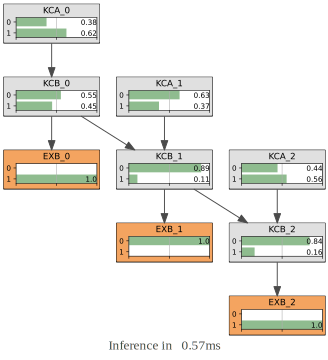

In [8]:
v1_bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    v1_bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    v1_bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))
    v1_bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))

    v1_bkt_net.add(gum.LabelizedVariable(f"EXB_{i}", '', 2))
    v1_bkt_net.addArc(*(f"KCB_{i}", f"EXB_{i}"))
    v1_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": False}] = [1-guess, guess]
    v1_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": True}] = [slip, 1-slip]
    evs[f"EXB_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        v1_bkt_net.addArc(*(f"KCB_{i-1}", f"KCB_{i}"))
        v1_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False, f"KCA_{i}": False}] = [1-learn*.01, learn*.01]
        v1_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False, f"KCA_{i}": True}] = [1-learn*.5, learn*.5]
        v1_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True, f"KCA_{i}": False}] = [.99, .01]
        v1_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True, f"KCA_{i}": True}] = [0, 1]
    else:
        v1_bkt_net.cpt(f"KCB_0")[{f"KCA_0": True}] = [.5, .5]
        v1_bkt_net.cpt(f"KCB_0")[{f"KCA_0": False}] = [.99, .01]    



v1_bkt_net.cpt(f"KCA_0").fillWith([.5, .5])
v1_bkt_net.cpt(f"KCA_1").fillWith([.5, .5])
v1_bkt_net.cpt(f"KCA_2").fillWith([.5, .5])

gnb.showInference(v1_bkt_net, evs=evs)

### Classic BKT V2

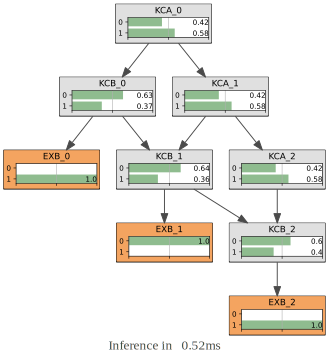

In [9]:
v2_bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    v2_bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    v2_bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))
    v2_bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))

    v2_bkt_net.add(gum.LabelizedVariable(f"EXB_{i}", '', 2))
    v2_bkt_net.addArc(*(f"KCB_{i}", f"EXB_{i}"))
    v2_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": False}] = [1-guess, guess]
    v2_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": True}] = [slip, 1-slip]
    evs[f"EXB_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        v2_bkt_net.addArc(*(f"KCA_{i-1}", f"KCA_{i}"))
        v2_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False}] = [1, 0]
        v2_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True}] = [0, 1]

        v2_bkt_net.addArc(*(f"KCB_{i-1}", f"KCB_{i}"))
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False, f"KCA_{i}": False}] = [1-learn*.01, learn*.01]
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False, f"KCA_{i}": True}] = [1-learn*.5, learn*.5]
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True, f"KCA_{i}": False}] = [.99, .01]
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True, f"KCA_{i}": True}] = [0, 1]
    else:
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": True}] = [.5, .5]
        v2_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": False}] = [.99, .01]    
        v2_bkt_net.cpt(f"KCA_{i}").fillWith([.5, .5])

gnb.showInference(v2_bkt_net, evs=evs)

### Classic BKT V3

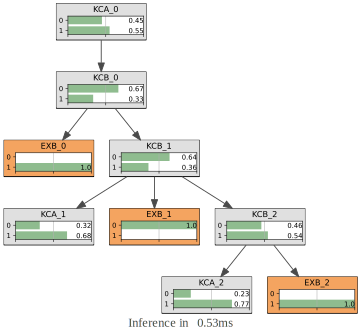

In [10]:
v3_bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    v3_bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    v3_bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))

    v3_bkt_net.add(gum.LabelizedVariable(f"EXB_{i}", '', 2))
    v3_bkt_net.addArc(*(f"KCB_{i}", f"EXB_{i}"))
    v3_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": False}] = [1-guess, guess]
    v3_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": True}] = [slip, 1-slip]
    evs[f"EXB_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        v3_bkt_net.addArc(*(f"KCB_{i}", f"KCA_{i}"))

        v3_bkt_net.addArc(*(f"KCB_{i-1}", f"KCB_{i}"))
        v3_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False}] = [1-learn, learn]
        v3_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True}] = [0, 1]
        
        v3_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False, f"KCB_{i}": False}] = [1, 0]
        v3_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False, f"KCB_{i}": True}] = [.01, .99]
        v3_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True, f"KCB_{i}": False}] = [.5, .5]
        v3_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True, f"KCB_{i}": True}] = [0, 1]

    else:
        v3_bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))
        v3_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": True}] = [.5, .5]
        v3_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": False}] = [.99, .01]    
        v3_bkt_net.cpt(f"KCA_{i}").fillWith([.5, .5])

gnb.showInference(v3_bkt_net, evs=evs)

### Classic BKT V4

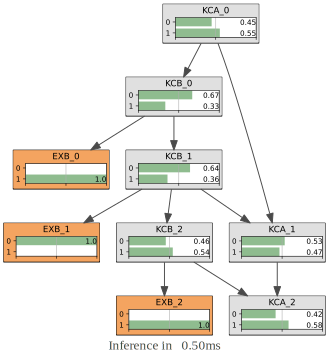

In [11]:
v4_bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    v4_bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    v4_bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))

    v4_bkt_net.add(gum.LabelizedVariable(f"EXB_{i}", '', 2))
    v4_bkt_net.addArc(*(f"KCB_{i}", f"EXB_{i}"))
    v4_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": False}] = [1-guess, guess]
    v4_bkt_net.cpt(f"EXB_{i}")[{f"KCB_{i}": True}] = [slip, 1-slip]
    evs[f"EXB_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        v4_bkt_net.addArc(*(f"KCA_{i-1}", f"KCA_{i}"))
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False}] = [1, 0]
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True}] = [0, 1]
        v4_bkt_net.addArc(*(f"KCB_{i}", f"KCA_{i}"))

        v4_bkt_net.addArc(*(f"KCB_{i-1}", f"KCB_{i}"))
        v4_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": False}] = [1-learn, learn]
        v4_bkt_net.cpt(f"KCB_{i}")[{f"KCB_{i-1}": True}] = [0, 1]
        
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False, f"KCB_{i}": False}] = [1, 0]
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False, f"KCB_{i}": True}] = [.01, .99]
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True, f"KCB_{i}": False}] = [.5, .5]
        v4_bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True, f"KCB_{i}": True}] = [0, 1]

    else:
        v4_bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))
        v4_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": True}] = [.5, .5]
        v4_bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": False}] = [.99, .01]    
        v4_bkt_net.cpt(f"KCA_{i}").fillWith([.5, .5])

gnb.showInference(v4_bkt_net, evs=evs)

### Cheated BKT network V1 

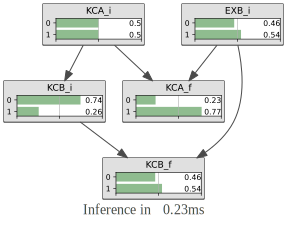

In [12]:
v1_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.54
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"EXB_i", '', 2))
v1_cheated_bkt_net.addArc(*(f"EXB_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXB_i": False, "KCA_i": False}] = [.5, .5]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXB_i": False, "KCA_i": True}] = [.5, .5]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXB_i": True, "KCA_i": False}] = [0, 1]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXB_i": True, "KCA_i": True}] = [0, 1]

v1_cheated_bkt_net.addArc(*(f"EXB_i", f"KCB_f"))
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": False, "KCB_i": False}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": False, "KCB_i": True}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": True, "KCB_i": False}] = [0, 1]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": True, "KCB_i": True}] = [0, 1]



v1_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v1_cheated_bkt_net.cpt(f"EXB_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v1_cheated_bkt_net)

### B. Cheated BKT network V2

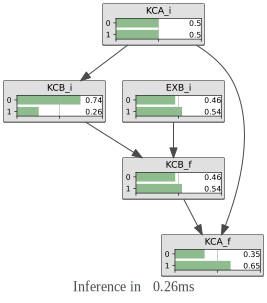

In [13]:
v2_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.54
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"EXB_i", '', 2))
v2_cheated_bkt_net.addArc(*(f"EXB_i", f"KCB_f"))
v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v2_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v2_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": False, "KCB_i": False}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": False, "KCB_i": True}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": True, "KCB_i": False}] = [0, 1]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"EXB_i": True, "KCB_i": True}] = [0, 1]

v2_cheated_bkt_net.addArc(*(f"KCB_f", f"KCA_f"))
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": False, "KCA_i": False}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": False, "KCA_i": True}] = [.5, .5]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": True, "KCA_i": False}] = [.01, .99]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": True, "KCA_i": True}] = [0, 1]



v2_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v2_cheated_bkt_net.cpt(f"EXB_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v2_cheated_bkt_net)

### B. Cheated BKT network V3

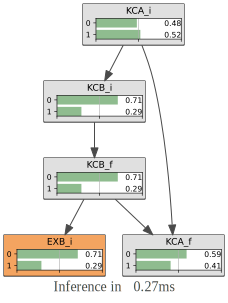

In [14]:
v3_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.54
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"EXB_i", '', 2))
v3_cheated_bkt_net.addArc(*("KCB_f", "EXB_i"))
v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v3_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v3_cheated_bkt_net.cpt(f"EXB_i")[{f"KCB_f": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"EXB_i")[{f"KCB_f": True}] = [0, 1]

v3_cheated_bkt_net.cpt(f"KCB_f")[{"KCB_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCB_f")[{"KCB_i": True}] = [0, 1]


v3_cheated_bkt_net.addArc(*(f"KCB_f", f"KCA_f"))
v3_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": False, "KCA_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": False, "KCA_i": True}] = [.5, .5]
v3_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": True, "KCA_i": False}] = [.01, .99]
v3_cheated_bkt_net.cpt(f"KCA_f")[{f"KCB_f": True, "KCA_i": True}] = [0, 1]



v3_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])

gnb.showInference(v3_cheated_bkt_net, evs={"EXB_i": [1 - ex_fam_a_score, ex_fam_a_score]})

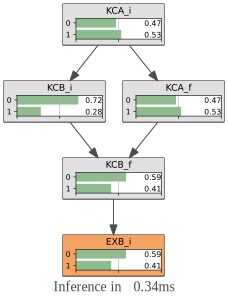

In [15]:
v3_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.54
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"EXB_i", '', 2))
v3_cheated_bkt_net.addArc(*("KCB_f", "EXB_i"))
v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v3_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v3_cheated_bkt_net.cpt(f"EXB_i")[{f"KCB_f": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"EXB_i")[{f"KCB_f": True}] = [0, 1]

v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": True}] = [0, 1]


v3_cheated_bkt_net.addArc(*(f"KCA_f", f"KCB_f"))
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": True}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": False}] = [.5, .5]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": True}] = [0, 1]



v3_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
gnb.showInference(v3_cheated_bkt_net, evs={"EXB_i": [1 - ex_fam_a_score, ex_fam_a_score]})